In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import matplotlib

%matplotlib inline

In [2]:
# color
cmap = plt.get_cmap('Wistia')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))


# fontsizes
matplotlib.rc('xtick', labelsize=15) # x tick
matplotlib.rc('ytick', labelsize=15) # y tick
matplotlib.rc('font', size=10) # default text sizes
matplotlib.rc('axes', titlesize=25) # axes title
matplotlib.rc('axes', labelsize=20) # x,y labels
matplotlib.rc('figure', titlesize=30) # figure title 

In [3]:
IMAGE_PATH = 'data/images'
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + '.' + fig_extension)
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)    

In [4]:
!sed -i 's/archive.ubuntu.com/ftp.daumkakao.com/g' /etc/apt/sources.list
!apt-get update 
!fc-cache -fv
!apt-get install -y fonts-nanum
!rm -rf ~/.cache/matplotlib/*
plt.rc('font', family='NanumBarunGothic')

'sed'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'fc-cache'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


### 전부합쳐진 데이터 살펴보기

In [5]:
df = pd.read_csv('registration/disabled_numeric.csv')
df.head()

D:\Program Files\Anaconda3\envs\ds\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3,4,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,통계년월,통계시도명,통계시군구명,장애등급명,장애유형명,등록장애인수,장애등급,장애유형,장애정도
0,201401,서울특별시,종로구,1급,지체,58,NaN,NaN,NaN
1,201401,서울특별시,종로구,1급,시각,189,NaN,NaN,NaN
2,201401,서울특별시,종로구,1급,청각,29,NaN,NaN,NaN
3,201401,서울특별시,종로구,1급,지적,86,NaN,NaN,NaN
4,201401,서울특별시,종로구,1급,뇌병변,154,NaN,NaN,NaN


In [6]:
df[df['장애유형명'].isnull()]['장애유형'].isnull().sum()

0

In [7]:
df[df['장애등급명'].isnull()]['장애등급'].isnull().sum()

130319

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039449 entries, 0 to 1039448
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   통계년월    1039449 non-null  int64 
 1   통계시도명   1039449 non-null  object
 2   통계시군구명  1039449 non-null  object
 3   장애등급명   592162 non-null   object
 4   장애유형명   592162 non-null   object
 5   등록장애인수  1039449 non-null  int64 
 6   장애등급    316968 non-null   object
 7   장애유형    447287 non-null   object
 8   장애정도    130319 non-null   object
dtypes: int64(2), object(7)
memory usage: 71.4+ MB


### 년도별로 나눈 데이터 불러오기

In [9]:
input_file = 'registration'
aFile = glob.glob(os.path.join(input_file, 'regist*'))
aFile

['registration\\regist2014.csv',
 'registration\\regist2015.csv',
 'registration\\regist2016.csv',
 'registration\\regist2017.csv',
 'registration\\regist2018.csv',
 'registration\\regist2019.csv',
 'registration\\regist2020.csv',
 'registration\\regist2021.csv']

In [51]:
dfs = []

for f in aFile:
    data = pd.read_csv(f, engine='python', encoding='utf-8')
    dfs.append(data)
    
dfs[-1].head()

,통계년월,통계시도명,통계시군구명,장애유형,장애정도,등록장애인수
0,202101,서울특별시,종로구,지적,심한 장애,399
1,202101,서울특별시,종로구,뇌병변,심한 장애,343
2,202101,서울특별시,종로구,자폐성,심한 장애,101
3,202101,서울특별시,종로구,정신,심한 장애,259
4,202101,서울특별시,종로구,신장,심한 장애,193


In [52]:
dfs[-1].shape

(23722, 6)

In [53]:
dfs[0].shape

(165075, 6)

In [58]:
dfs[-2].shape

(71103, 6)

### 년도별 등록장애인수 & visualization

In [62]:
dfs[-1]['통계시도명'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [61]:
dfs[-1]['등록장애인수'].sum()

10534896

In [63]:
dfs[0]['등록장애인수'].sum()

29938938

In [ ]:
Number of registrants by disability type by region/month

In [ ]:
def numOfRegistBy_disabilityType_year_month_region(year, mont, region):
    

In [70]:
df2021 = dfs[-1]

r = []

for i in range(len(types)):
    r.append(df2021[df2021['장애유형']==types[i]]['등록장애인수'].sum())
    
r

[4816116,
 1008279,
 1593538,
 871514,
 998542,
 125220,
 414331,
 393516,
 46119,
 55821,
 90107,
 20899,
 28393,
 10682,
 61819]

In [67]:
sums = []

for i in range(0, len(dfs)-1):
    for j in range(0, len(types)):
        sums.append(dfs[i][dfs[i]['통계시도명']==types[j]]['등록장애인수'].sum())

        
sums

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [33]:
31522896 - 29938938

1583958

In [13]:
avgs = []

for i in range(0, len(dfs)-1):
    avgs.append(dfs[i]['등록장애인수'].mean())
    print(avgs[i])

181.36567014993184
180.73530497286373
181.25599482704442
183.71796657381614
185.98095836834375
264.34516912094324
443.3412936163031


In [ ]:
df['장애등급']

In [14]:
avgRateOfVar = (443.3 - 181.4) / 181.4 * 100
avgRateOfVar

144.37706725468576

Saving figure

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


 연도별 등록장애인 수 총합


D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags

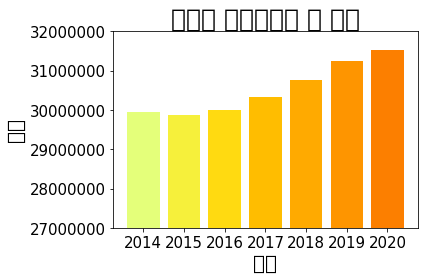

In [15]:
years = ['2014', '2015', '2016','2017','2018', '2019', '2020']

y = np.array([1,2,3,4,5,6,7])

plt.ticklabel_format(style = 'plain')

plt.bar(years, sums, color=cmap(rescale(y)))
plt.title('연도별 등록장애인 수 총합')
plt.xlabel('년도')
plt.ylabel('총합')
plt.ylim([27000000,32000000])

save_fig('연도별 등록장애인 수 총합')

Saving figure 연도별 등록장애인 수 평균


D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0, flags=flags)


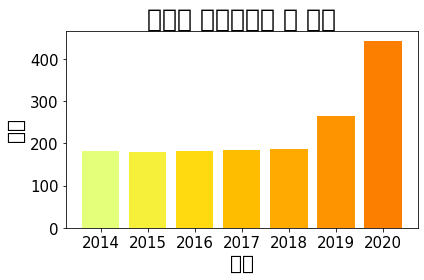

In [16]:
plt.ticklabel_format(style = 'plain')

plt.bar(years, avgs, color=cmap(rescale(y)))
plt.title('연도별 등록장애인 수 평균')
plt.xlabel('년도')
plt.ylabel('평균')

save_fig('연도별 등록장애인 수 평균')

### 장애인 등록자 들의 등급비율 & 시각화

In [17]:
df.head()

,통계년월,통계시도명,통계시군구명,장애등급명,장애유형명,등록장애인수,장애등급,장애유형,장애정도
0,201401,서울특별시,종로구,1급,지체,58,NaN,NaN,NaN
1,201401,서울특별시,종로구,1급,시각,189,NaN,NaN,NaN
2,201401,서울특별시,종로구,1급,청각,29,NaN,NaN,NaN
3,201401,서울특별시,종로구,1급,지적,86,NaN,NaN,NaN
4,201401,서울특별시,종로구,1급,뇌병변,154,NaN,NaN,NaN


In [18]:
df['장애등급명'].value_counts()

3급    133583
2급    128255
1급    109210
4급     92430
5급     88950
6급     39734
Name: 장애등급명, dtype: int64

In [57]:
use_df

,통계년월,통계시도명,통계시군구명,장애유형,장애정도,등록장애인수
0,202001,서울특별시,종로구,지적,심한 장애,394
1,202001,서울특별시,종로구,뇌병변,심한 장애,331
2,202001,서울특별시,종로구,자폐성,심한 장애,112
3,202001,서울특별시,종로구,정신,심한 장애,266
4,202001,서울특별시,종로구,신장,심한 장애,186
...,...,...,...,...,...,...
71098,202012,제주특별자치도,서귀포시,장루.요루,심하지 않은 장애,76
71099,202012,제주특별자치도,서귀포시,뇌전증,심하지 않은 장애,33
71100,202012,제주특별자치도,서귀포시,청각,심한 장애,423
71101,202012,제주특별자치도,서귀포시,언어,심한 장애,61


In [ ]:
use_df1 = pd.read_csv('')

In [59]:
rates = []
for i in range(0, 6):
    rates.append(use_df[use_df['장애등급명']=='{}급'.format(i+1)])

rates[1]

KeyError: '장애등급명'

In [20]:
sums_by_rate = []

for i in range(0,6):
    sums_by_rate.append(rates[i]['등록장애인수'].sum())
    print(sums_by_rate[i])

8523216
14445902
18619089
16050726
22626233
27184014


D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\ba

Saving figure 장애인 등급별 비율


D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50528 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.

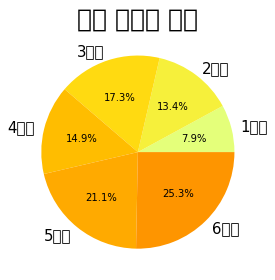

In [21]:
rating = ['1등급', '2등급', '3등급', '4등급', '5등급', '6등급']

plt.pie(sums_by_rate, labels=rating, autopct='%.1f%%', colors=cmap(rescale(y)))
plt.title('2020년 장애 등급별 비율')

save_fig('장애인 등급별 비율')

### 장애유형별 등록자수 

In [22]:
df['장애유형명'].unique()

array(['지체', '시각', '청각', '지적', '뇌병변', '자폐성', '정신', '신장', '호흡기', '간', '언어',
       '심장', '뇌전증', '안면', '장루.요루', nan], dtype=object)

In [23]:
df[df['장애유형명']=='지체']['등록장애인수'].sum()

55183863

In [64]:
types = ['지체', '시각', '청각', '지적', '뇌병변', '자폐성', '정신', '신장', '호흡기', '간', '언어',
       '심장', '뇌전증', '안면', '장루.요루']

sum_per_type = []

for i in range(0, len(types)):
    sum_per_type.append(df[df['장애유형명']==types[i]]['등록장애인수'].sum())
    
sum_per_type

[55183863,
 10866560,
 11151778,
 8119476,
 10783171,
 899314,
 4224291,
 3169409,
 521760,
 440908,
 806141,
 258953,
 303151,
 115426,
 604979]

In [25]:
sum_per_type.sort(reverse=True)
copyS = sum_per_type
print(copyS)
ectSum = sum(copyS[6:])
print(ectSum)

[55183863, 11151778, 10866560, 10783171, 8119476, 4224291, 3169409, 899314, 806141, 604979, 521760, 440908, 303151, 258953, 115426]
7120041


Saving figure 장애 유형별 등록장애인 수 비율


D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\ba

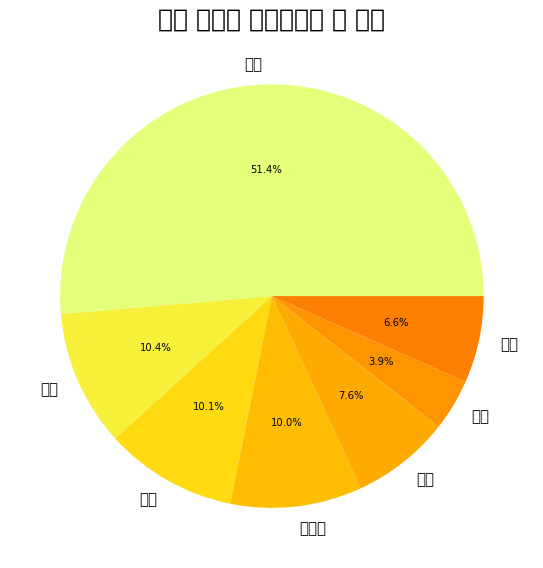

In [26]:
ltypes = ['지체','청각','시각','뇌병변','지적','정신', '기타']

vals = [55183863, 11151778, 10866560, 10783171, 8119476, 4224291, 7120041]

plt.rcParams['figure.figsize'] = (8,8)

sum_per_type.sort(reverse=True)
lspt = sum_per_type[:7]

plt.pie(vals, labels=ltypes, autopct='%.1f%%',colors=cmap(rescale(y)))
plt.title('장애 유형별 등록장애인 수 비율')

save_fig('장애 유형별 등록장애인 수 비율')

Saving figure 장애 유형별 등록장애인 수


D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\ds\lib\site-packages\matplotlib\backends\ba

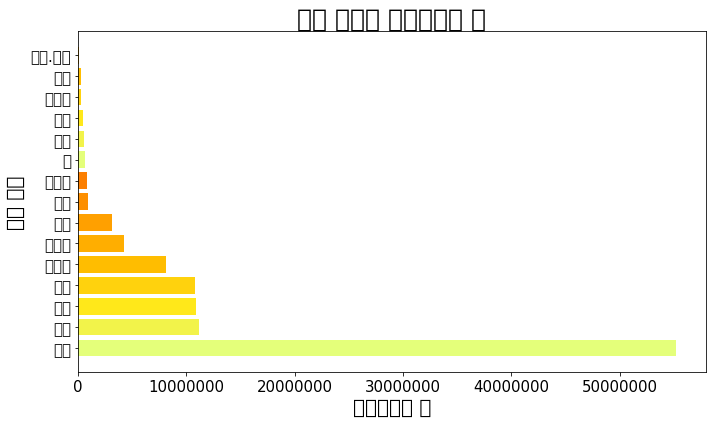

In [27]:
plt.rcParams['figure.figsize'] = (10,6)
plt.ticklabel_format(style = 'plain')

y = np.array([1,2,3,4,5,6,7,8,9])

plt.barh(types, sum_per_type, color=cmap(rescale(y)))

plt.title('장애 유형별 등록장애인 수')
plt.xlabel('등록장애인 수')
plt.ylabel('장애 유형')

save_fig('장애 유형별 등록장애인 수')

plt.show()

In [44]:
import matplotlib.font_manager as fm

In [43]:
df

,통계년월,통계시도명,통계시군구명,장애등급명,장애유형명,등록장애인수,장애등급,장애유형,장애정도
0,201401,서울특별시,종로구,1급,지체,58,NaN,NaN,NaN
1,201401,서울특별시,종로구,1급,시각,189,NaN,NaN,NaN
2,201401,서울특별시,종로구,1급,청각,29,NaN,NaN,NaN
3,201401,서울특별시,종로구,1급,지적,86,NaN,NaN,NaN
4,201401,서울특별시,종로구,1급,뇌병변,154,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1039444,202104,제주특별자치도,서귀포시,NaN,NaN,71,NaN,장루.요루,심하지 않은 장애
1039445,202104,제주특별자치도,서귀포시,NaN,NaN,32,NaN,뇌전증,심하지 않은 장애
1039446,202104,제주특별자치도,서귀포시,NaN,NaN,419,NaN,청각,심한 장애
1039447,202104,제주특별자치도,서귀포시,NaN,NaN,61,NaN,언어,심한 장애


### 시도별 등록자수

In [28]:
len(df['통계시도명'].unique())

17

In [29]:
# plt.rcParams['figure.figsize'] = (10, 5)
# plt.style.use('tableau-colorblind10')

# sns.countplot(df['통계시도명'], palette='RdPu')
# plt.title('시도별 등장 빈도수')
# plt.xticks(rotation=90)

# save_fig('시도별 등장 빈도수')

# plt.show()

In [30]:
df['통계시도명'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [42]:
df[df['통계시도명']=='세종특별자치시']['등록장애인수'].sum()

898658

In [54]:
city = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도']

sum_by_city = []

use_df = dfs[-2]

for i in range(0, len(city)):
    sum_by_city.append(use_df[use_df['통계시도명']==city[i]]['등록장애인수'].sum())
    
sum_by_city

[4736077,
 2111701,
 1512168,
 1746362,
 841921,
 876671,
 613039,
 145765,
 6784906,
 1218698,
 1172324,
 1608299,
 1587462,
 1696022,
 2173705,
 2260482,
 437294]

In [36]:
sum_by_city.sort()
sum_by_city

[898658,
 3057472,
 4399403,
 6079517,
 6335861,
 8404594,
 8788416,
 10568508,
 11334527,
 11545036,
 12205989,
 12499255,
 15089954,
 15262638,
 16117449,
 34689633,
 46943448]

Saving figure 2020, 시도별 등록장애인 수


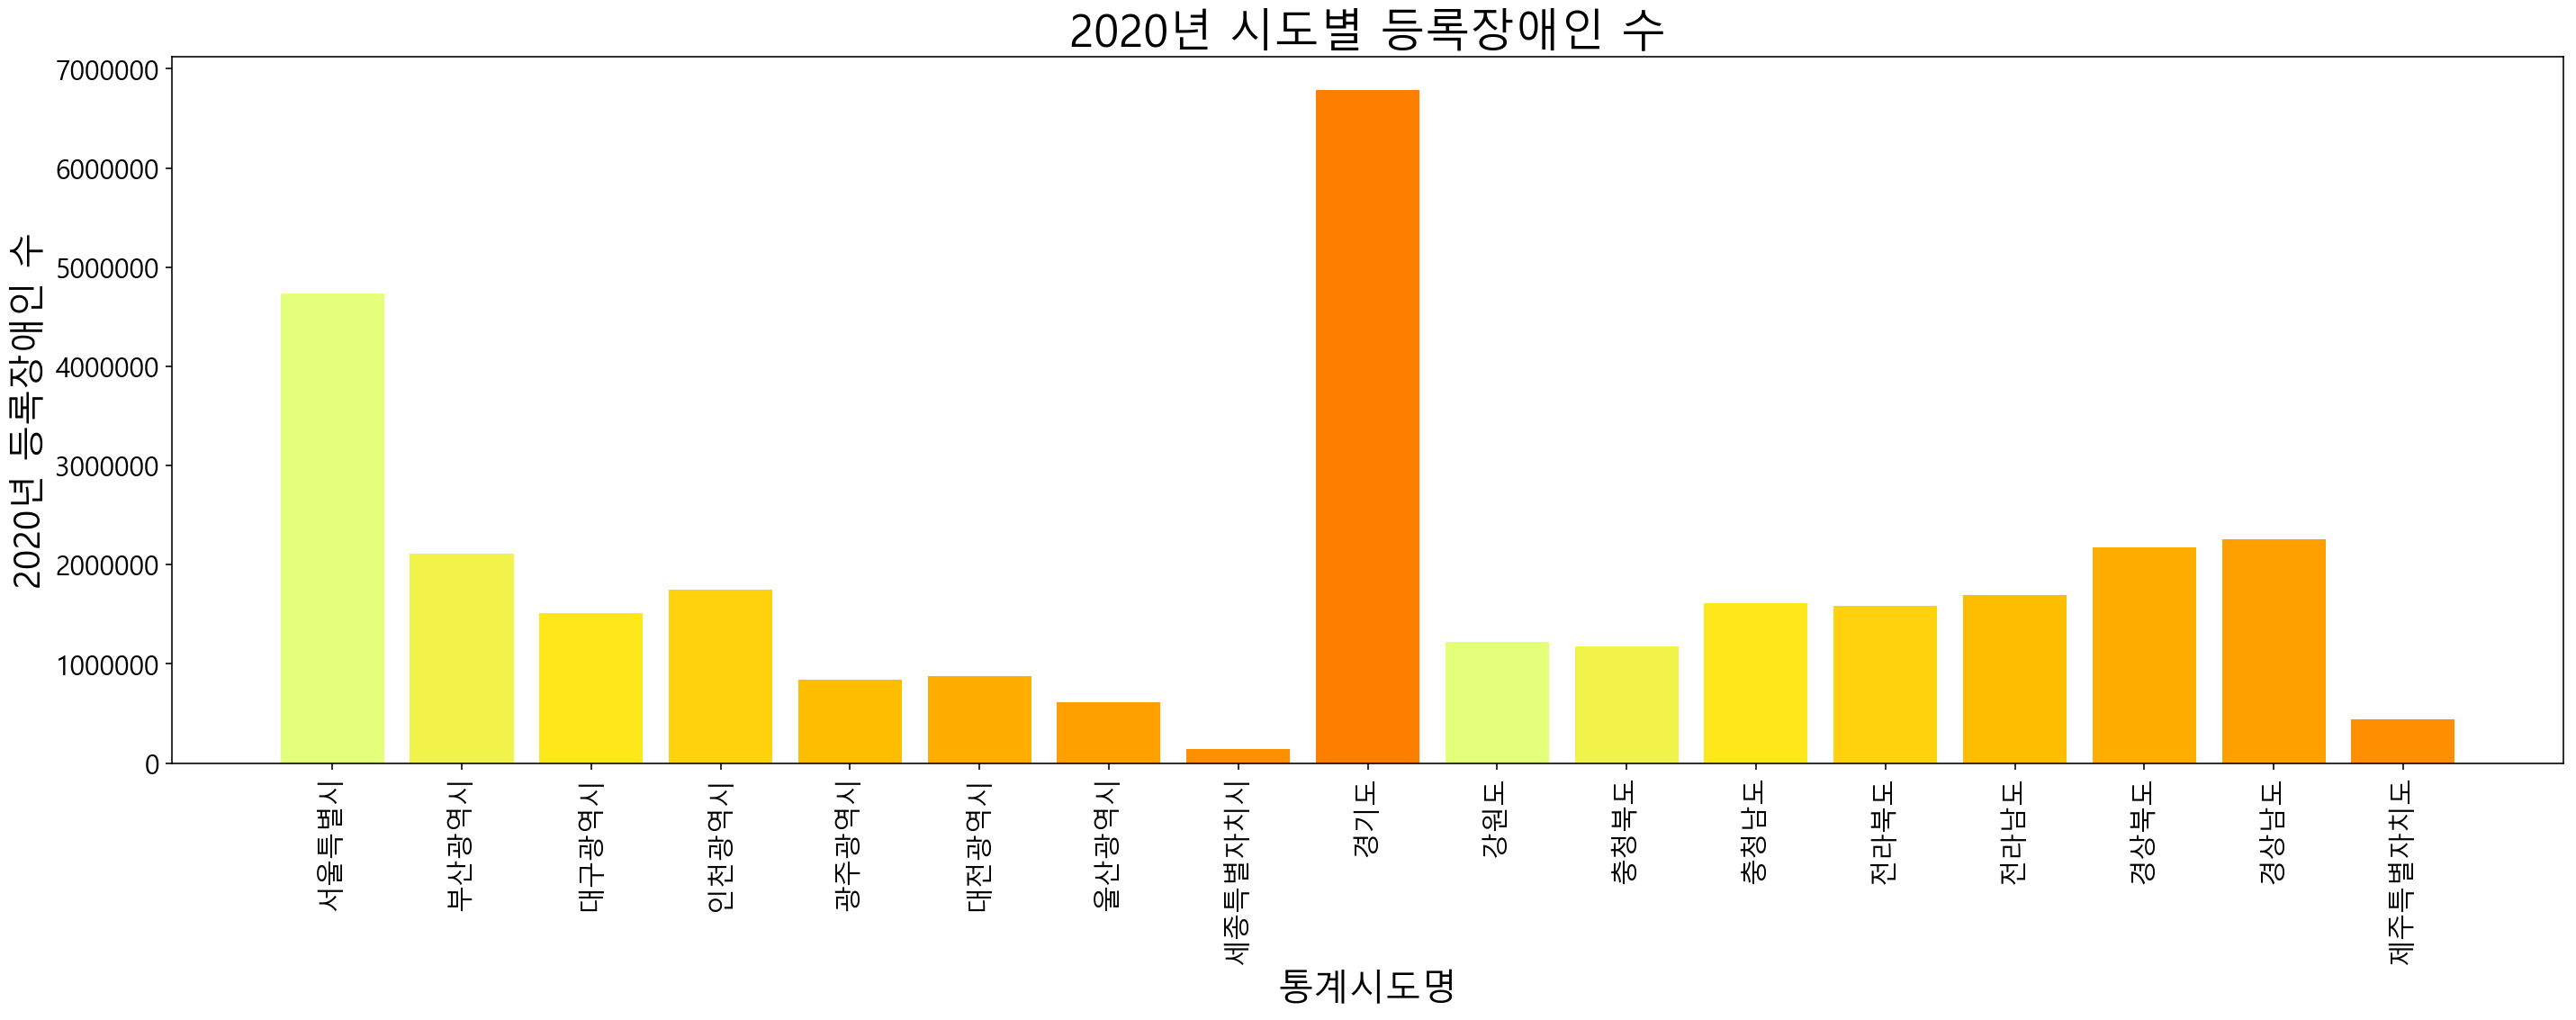

In [55]:
plt.rcParams['figure.figsize'] = (20,8)
plt.ticklabel_format(style = 'plain')

plt.bar(city, sum_by_city, color=cmap(rescale(y)))
plt.title('2020년 시도별 등록장애인 수')
plt.xlabel('통계시도명')
plt.ylabel('2020년 등록장애인 수')
plt.xticks(rotation = 90)

save_fig('2020, 시도별 등록장애인 수')

plt.show()

In [49]:
plt.rc('font', family='Malgun Gothic')

%config InlineBackend.figure_format = 'retina'